# Preparing the Data for Modeling

#### Start by importing necessary packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#### Import the cleaned data. 

This is the same data that is explored in the EDA file.

In [2]:
# Import the cleaned data
df = pd.read_csv('../Data/Cleaned_Data_03282024.csv')

In [3]:
# Set the max columns to infinite so that we may view all of them
pd.set_option('display.max_columns', None)

## Handling Null Values

#### We show and remove null values for modeling purposes.

We remove the rows with null values for square feet and ones that do not have an address listed.

The ones without addresses listed contain the string "None listed." However, the null values show up in the location coordinates. When we remove the missing address ones, the null values in these rows (latitude, longitude, nearest_budget_grocery_store_distance, etc.) will reduce to none.

In [4]:
df.dtypes

title                                      object
price                                       int64
Bedrooms                                   object
square_feet                               float64
full_address                               object
monthly                                     int64
apartment                                   int64
cats_allowed                                int64
dogs_allowed                                int64
laundry_on_site                             int64
air_conditioning                            int64
off_street_parking                          int64
EV_charging                                 int64
washer_dryer_in_unit                        int64
carport                                     int64
no_smoking                                  int64
attached_garage                             int64
detached_garage                             int64
laundry_in_bldg                             int64
fee_needed_to_apply                         int64


In [5]:
# Show which features contain null values
df.isna().sum()

title                                       0
price                                       0
Bedrooms                                    0
square_feet                               217
full_address                                0
monthly                                     0
apartment                                   0
cats_allowed                                0
dogs_allowed                                0
laundry_on_site                             0
air_conditioning                            0
off_street_parking                          0
EV_charging                                 0
washer_dryer_in_unit                        0
carport                                     0
no_smoking                                  0
attached_garage                             0
detached_garage                             0
laundry_in_bldg                             0
fee_needed_to_apply                         0
wheelchair_accessible                       0
no_parking                        

In [6]:
# Drop the rows with null square_feet measures
df.dropna(subset=['square_feet'], inplace=True)

In [7]:
# Create a copy of the DataFrame with the missing address rows filtered out
filtered_listings_df = df[df['full_address'] != 'None listed'].copy()

In [8]:
# Check to see that there are no null values now
filtered_listings_df.isnull().sum()

title                                     0
price                                     0
Bedrooms                                  0
square_feet                               0
full_address                              0
monthly                                   0
apartment                                 0
cats_allowed                              0
dogs_allowed                              0
laundry_on_site                           0
air_conditioning                          0
off_street_parking                        0
EV_charging                               0
washer_dryer_in_unit                      0
carport                                   0
no_smoking                                0
attached_garage                           0
detached_garage                           0
laundry_in_bldg                           0
fee_needed_to_apply                       0
wheelchair_accessible                     0
no_parking                                0
furnished                       

## Standardization

#### Let us now use StandardScaler from sklearn to standardize a few features.

We have chosen to standardize and not normalize this data. Standardization will transform the features we want such that the mean will be zero with a standard deviation of one. These features include square_feet, nearest_budget_grocery_store_distance, nearest_midTier_grocery_store_distance, and nearest_premium_grocery_store_distance. 

We do not need to worry about the boolean features or the latitudes and longitudes. Standardization is chosen over normalization because the range varies widely in each of the four features. 

In [9]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [10]:
# Select columns to standardize
columns_to_standardize = ['square_feet', 'nearest_budget_grocery_store_distance', 
                          'nearest_midTier_grocery_store_distance', 'nearest_premium_grocery_store_distance']

In [11]:
# Standardize the selected columns
filtered_listings_df[columns_to_standardize] = scaler.fit_transform(filtered_listings_df[columns_to_standardize])

In [12]:
target = filtered_listings_df['price']

In [13]:
# Create the features by dropping unwanted variables
features = filtered_listings_df.drop(['title', 'nearest_budget_grocery_store', 
                    'nearest_midTier_grocery_store', 'house', 'monthly', 'latitude', 
                    'nearest_premium_grocery_store', 'Bedrooms', 'full_address',
                    'apartment', 'price', 'longitude'], axis=1)

#### Let's now perform splitting of the data for the model.

In [14]:
# Split the features and target variable into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Linear Regression

#### This model will serve as a simple to interpret starting point.

The simplicity of the equation Y = B(0) + B(1)x(1) + ... + B(n)x(n) lets us easily see which features contribute to the prediction and how significant their contributions are. 

In [15]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

#### Let us see what the coefficients are for the independent variables in the linear regression model.

We will set up a dataframe for the purposes of displaying the coefficients, rounding off the values to two decimal places for brevity.

In [16]:
# Retrieve the coefficients
coefficients = linear_model.coef_

# Pair each feature with its coefficient
feature_coefficients = pd.DataFrame(data=coefficients, index=X_train.columns, columns=['Coefficient'])

# Round off the values
feature_coefficients = feature_coefficients.apply(lambda x: round(x, 2))

# Display the coefficients
print(feature_coefficients)

                                        Coefficient
square_feet                                  169.06
cats_allowed                                  98.03
dogs_allowed                                 220.57
laundry_on_site                              -77.08
air_conditioning                             -38.02
off_street_parking                          -242.63
EV_charging                                  209.52
washer_dryer_in_unit                         375.83
carport                                     -375.60
no_smoking                                    15.99
attached_garage                             -443.42
detached_garage                             -514.25
laundry_in_bldg                              -97.05
fee_needed_to_apply                           69.34
wheelchair_accessible                        611.72
no_parking                                    30.51
furnished                                   -491.01
street_parking                              -524.21
no_laundry_o

#### Next we view the linear regression equation.

In [17]:
# Return the intercept and coefficients
intercept = linear_model.intercept_
coefficients = linear_model.coef_

# Get feature names
feature_names = features.columns

# Construct the equation as a string
equation = f"Price = {intercept:.2f} "
equation += " ".join([f"+ ({coef:.2f}) * {name}" for coef, name in zip(coefficients, feature_names)])

print(equation)

Price = 2916.90 + (169.06) * square_feet + (98.03) * cats_allowed + (220.57) * dogs_allowed + (-77.08) * laundry_on_site + (-38.02) * air_conditioning + (-242.63) * off_street_parking + (209.52) * EV_charging + (375.83) * washer_dryer_in_unit + (-375.60) * carport + (15.99) * no_smoking + (-443.42) * attached_garage + (-514.25) * detached_garage + (-97.05) * laundry_in_bldg + (69.34) * fee_needed_to_apply + (611.72) * wheelchair_accessible + (30.51) * no_parking + (-491.01) * furnished + (-524.21) * street_parking + (87.01) * no_laundry_on_site + (-288.71) * washer_dryer_hookups + (79.32) * nearest_budget_grocery_store_distance + (0.70) * nearest_midTier_grocery_store_distance + (-173.88) * nearest_premium_grocery_store_distance


#### Let's make predictions using the linear regression model and then look at visualizations.

In [18]:
# Make linear regression predictions
linear_predictions = linear_model.predict(X_test)

### Visualizations - Linear Regression

#### Let's view the results visually, starting with a residuals plot for linear regression.

A residuals plot shows the difference between the observed values and values predicted by the model. 

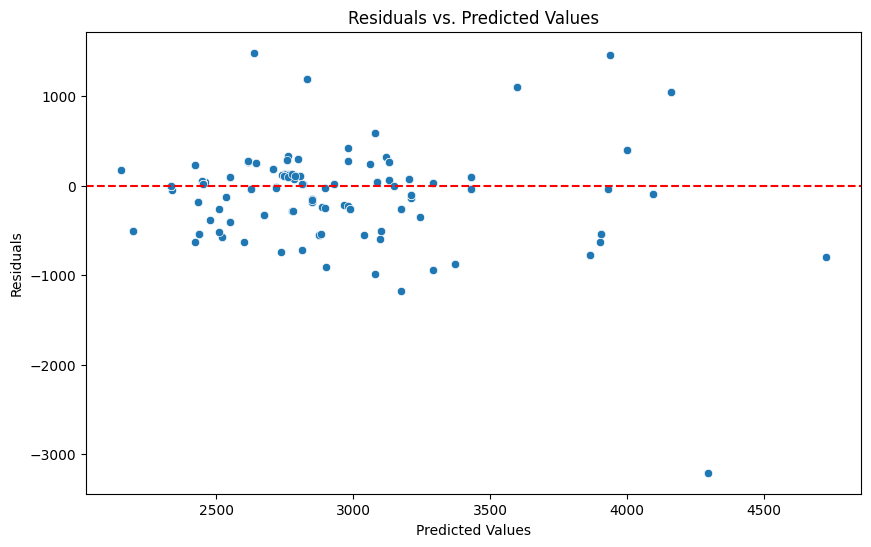

In [19]:
# Construct residuals plot using predictions
residuals = y_test - linear_predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=linear_predictions, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#### Coefficient Importance Plot - Linear Regression

A coefficient importance plot shows the magnitude each feature has on the prediction. 

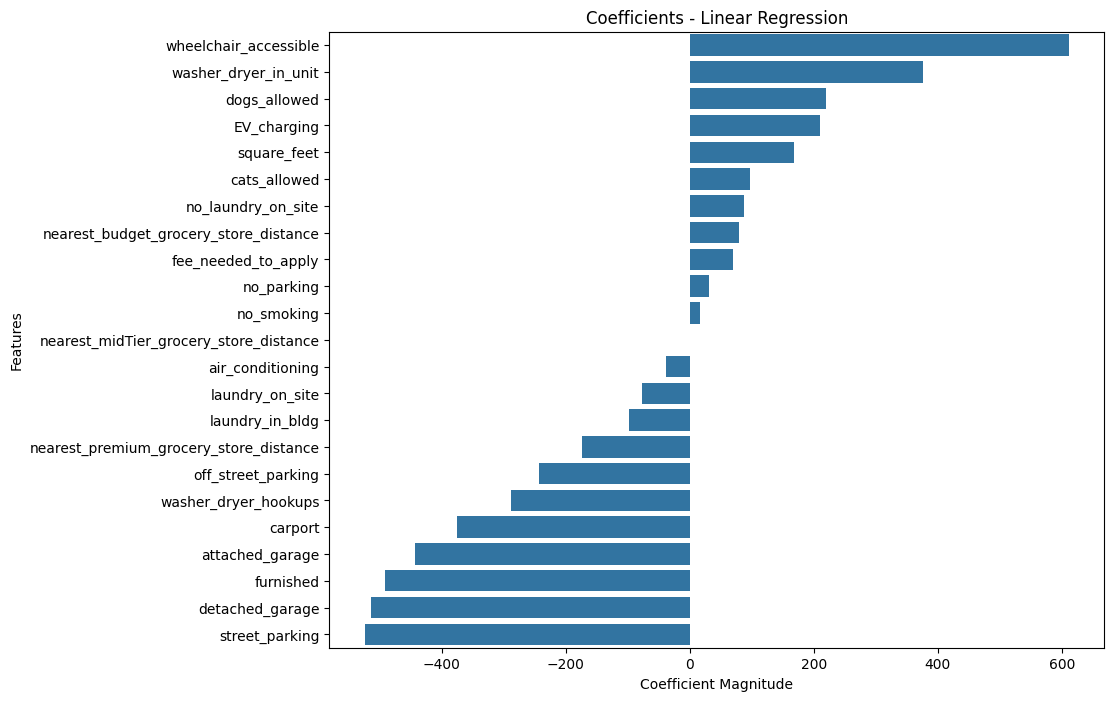

In [35]:
# Get coefficients
coefficients = pd.DataFrame(data=linear_model.coef_, index=X_train.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
sns.barplot(x=coefficients['Coefficient'], y=coefficients.index)
plt.title('Coefficients - Linear Regression')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.show()

#### Prediction Error Plot - Linear Regression

The prediction error plot shows the distribution of errors made by the model and is ideally centered close to zero indicating accurate predictions.

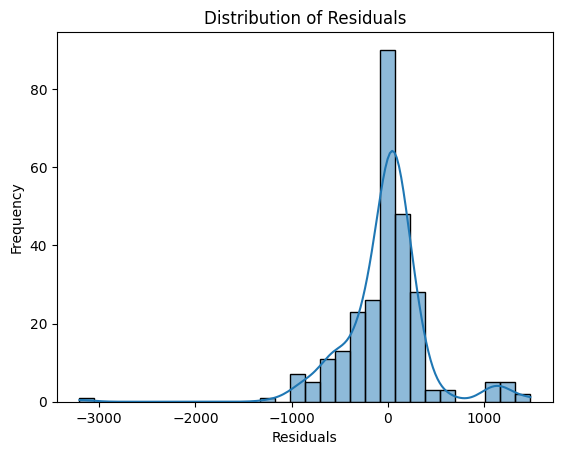

In [21]:
# Prediction Error Plot Setup
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### Results - Linear Regression

#### Let's calculate the metrics for this model. 

We will be using mean absolute error (mae_linear), mean standard error (mse_linear), root mean square error (rmse_linear), and r-squared (r2_linear).

In [22]:
mae_linear = mean_absolute_error(y_test, linear_predictions)
mse_linear = mean_squared_error(y_test, linear_predictions)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, linear_predictions)

print(f"Mean Absolute Error (MAE): {mae_linear}")
print(f"Mean Squared Error (MSE): {mse_linear}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear}")
print(f"R-squared (R²) score: {r2_linear}")

Mean Absolute Error (MAE): 265.85087618771826
Mean Squared Error (MSE): 191431.38518621217
Root Mean Squared Error (RMSE): 437.52872498409994
R-squared (R²) score: 0.46279681462446676


## Random Forest

#### A Random Forest Regression Model will be much better at capturing non-linear data patterns.

However, a random forest model loses out to the linear regression model on interpretability. A random forest model is made up of many decision trees, which are by themselves quite interpretable, that together make interpretation complex as each tree is different. This makes it more difficult to visualize than a model like linear regression. Ideally, it will generalize well to new data due to its ability to handle complex patterns. The following cells run a random forest model, show visualizations, make predictions, and finally calculate metrics.

In [23]:
# Random Forest Regression
random_forest_model = RandomForestRegressor(
    n_estimators=100, 
    random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### Random Forest Predictions

In [24]:
# Predictions
rf_predictions = random_forest_model.predict(X_test)

#### Feature Importance Plot - Random Forest

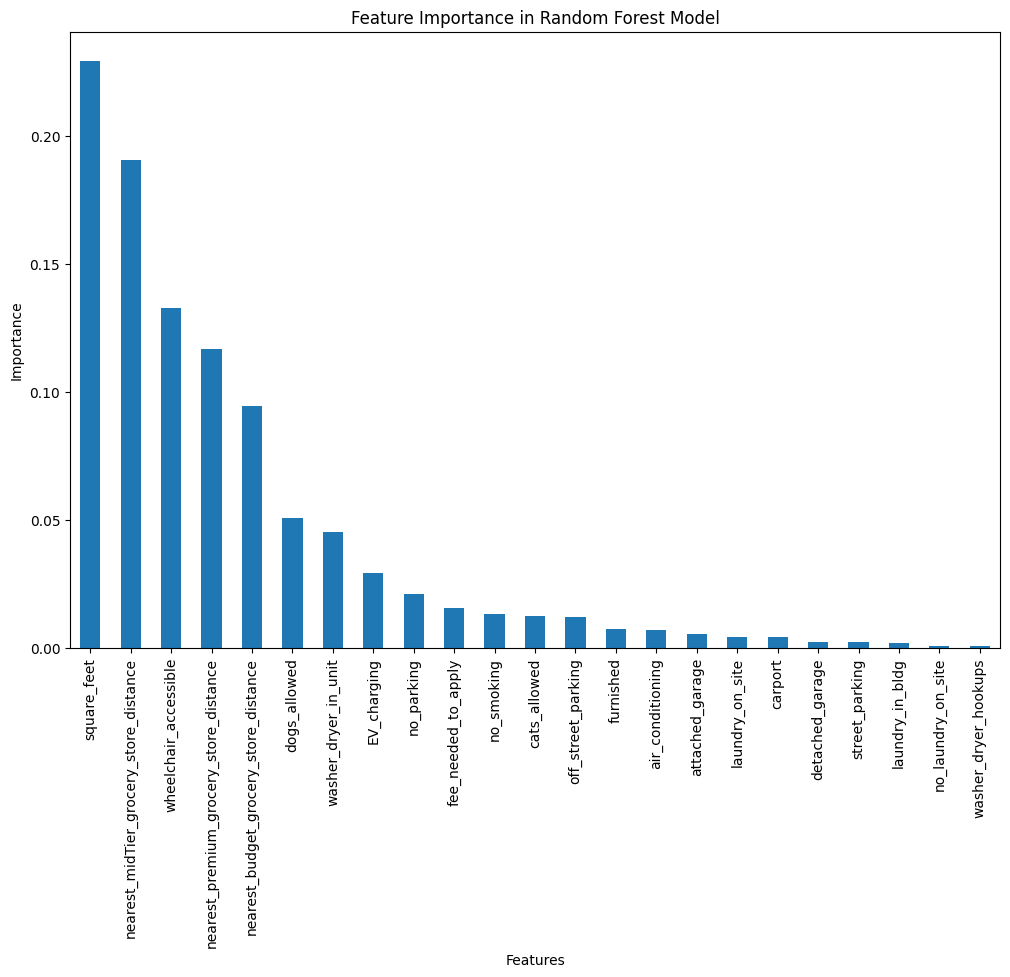

In [25]:
# Get feature importances
importances = random_forest_model.feature_importances_
# Convert to a Series
feature_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 8))
feature_importances.plot(kind='bar')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

#### Scatterplot - Random Forest

The scatterplot compares the predicted values against the actual values to show how well the model is predicting. 

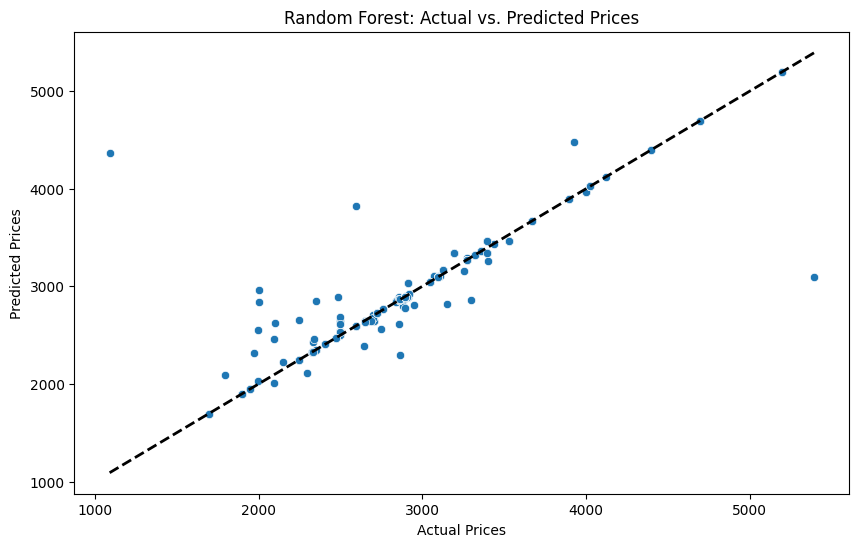

In [26]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=rf_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.title('Random Forest: Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


#### Residuals Plot - Random Forest

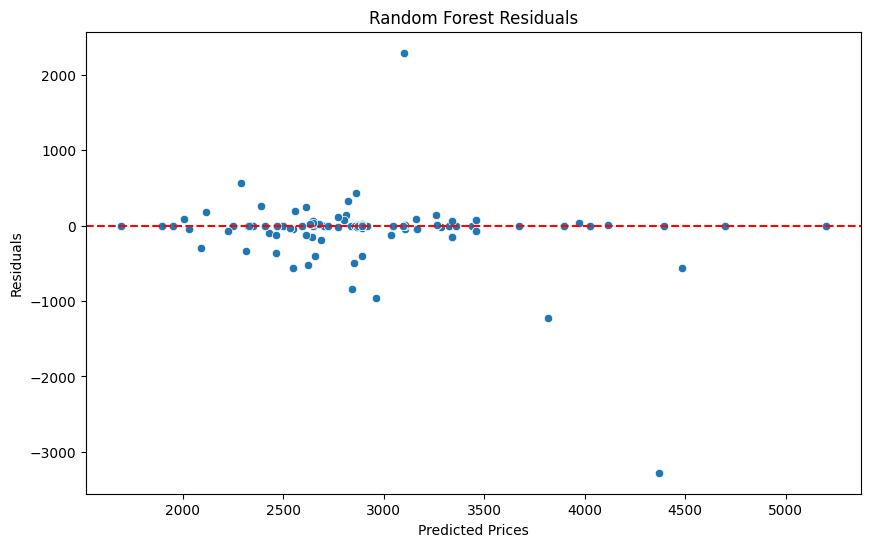

In [27]:
# Calculating residuals
rf_residuals = y_test - rf_predictions

plt.figure(figsize=(10, 6))
sns.scatterplot(x=rf_predictions, y=rf_residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Reference line at y=0
plt.title('Random Forest Residuals')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

### Results - Linear Regression

In [28]:
mae_rf = mean_absolute_error(y_test, rf_predictions)
mse_rf = mean_squared_error(y_test, rf_predictions)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, rf_predictions)

print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R-squared (R²) score: {r2_rf}")

Mean Absolute Error (MAE): 73.66201283453343
Mean Squared Error (MSE): 82157.74685507499
Root Mean Squared Error (RMSE): 286.6317268815073
R-squared (R²) score: 0.7694453118495126


## Gradient Boosting

The Gradient Boosting model is chosen for its ability to handle complex relationships and produce high accuracy results. The downside with a gradient boosting model is that it is the most computationally intensive and difficult to interpret, even than the Random Forest model. This model will be more sensitive to data and, while producing high accuracy, could potentially overfit the training data. Therefore, we may need to perform iterative tuning of this model to make sure it generalizes well to unseen data.

In [29]:
# Gradient Boosting Regression
gradient_boosting_model = GradientBoostingRegressor(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=3, 
    random_state=42)
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

#### Feature Importance Plot - Gradient Boosting

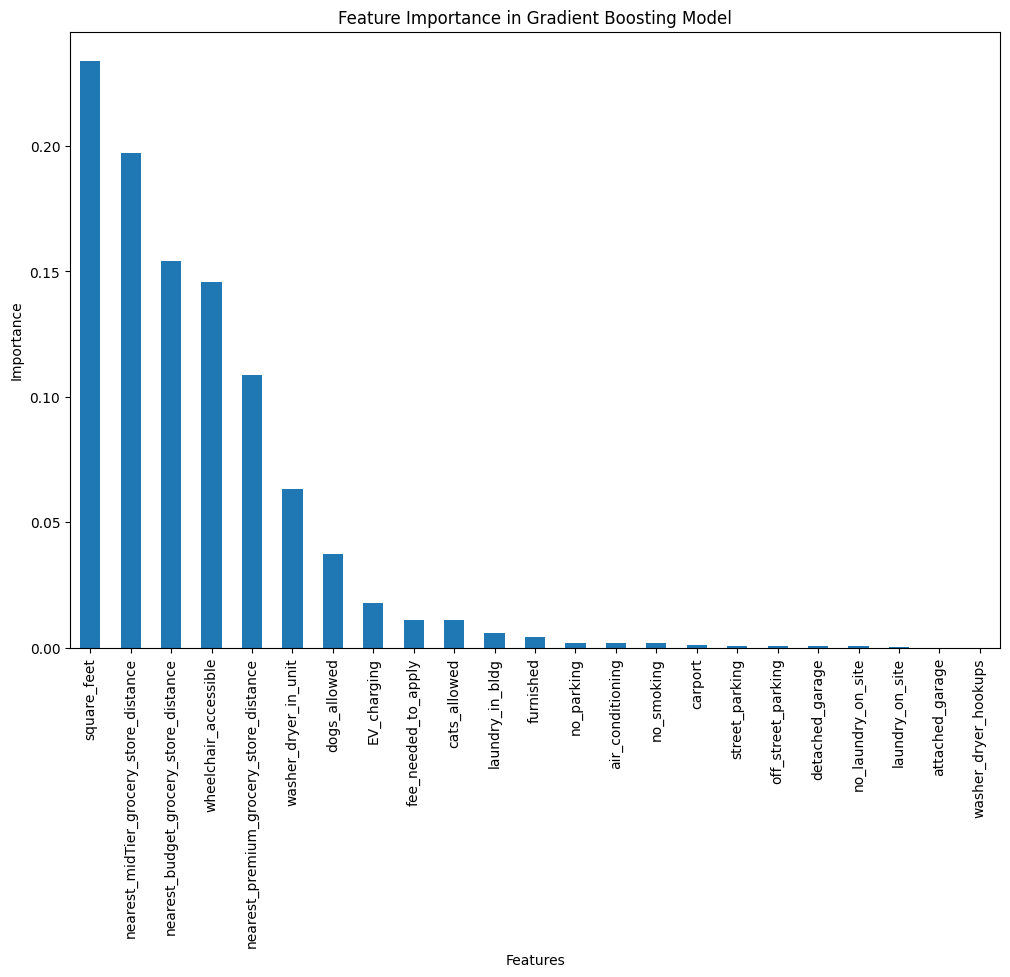

In [30]:
# Get feature importances
gb_importances = gradient_boosting_model.feature_importances_
# Convert to a Series
gb_feature_importances = pd.Series(gb_importances, index=X_train.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 8))
gb_feature_importances.plot(kind='bar')
plt.title('Feature Importance in Gradient Boosting Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

#### Scatterplot - Gradient Boosting

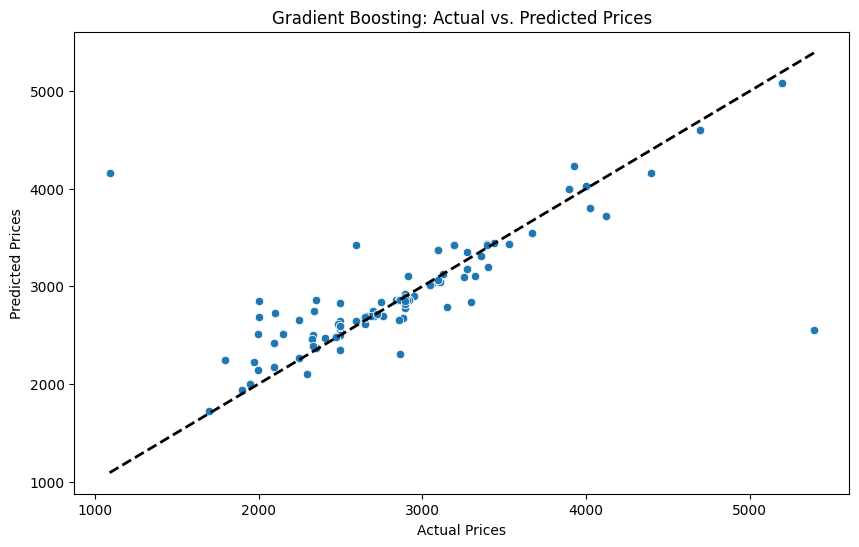

In [31]:
# Predictions
gb_predictions = gradient_boosting_model.predict(X_test)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=gb_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  
plt.title('Gradient Boosting: Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

#### Residuals Plot - Gradient Boosting

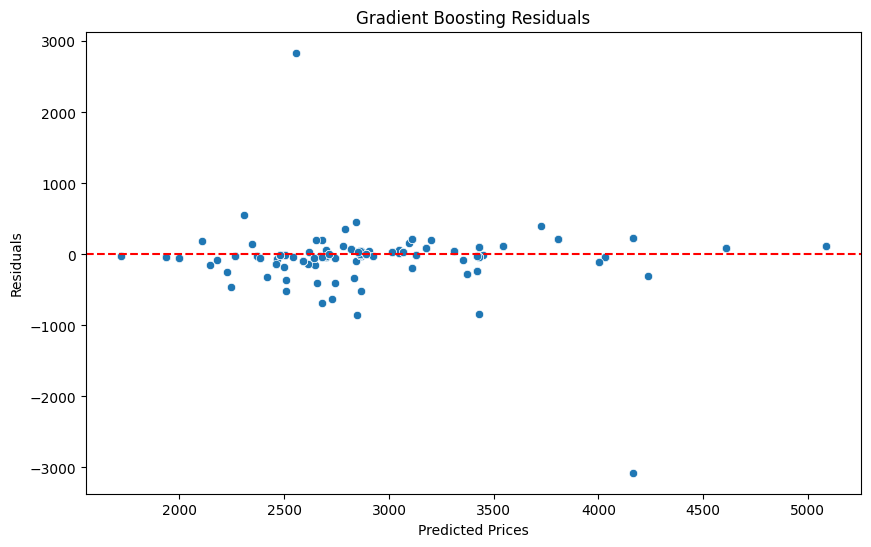

In [32]:
# Calculating residuals
gb_residuals = y_test - gb_predictions

plt.figure(figsize=(10, 6))
sns.scatterplot(x=gb_predictions, y=gb_residuals)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Gradient Boosting Residuals')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

### Results - Gradient Boosting

In [33]:
mae_gb = mean_absolute_error(y_test, gb_predictions)
mse_gb = mean_squared_error(y_test, gb_predictions)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, gb_predictions)

print(f"Mean Absolute Error (MAE): {mae_gb}")
print(f"Mean Squared Error (MSE): {mse_gb}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb}")
print(f"R-squared (R²) score: {r2_gb}")

Mean Absolute Error (MAE): 108.11458713531178
Mean Squared Error (MSE): 88900.24651846122
Root Mean Squared Error (RMSE): 298.16144371541606
R-squared (R²) score: 0.7505242122971001
